# NBA 2017 [Hackathon](https://hackathon.nba.com/)
---

## Question

You should use the data provided in this [LINK](https://ak-static-int.nba.com/wp-content/uploads/sites/2/2017/06/Business-Track-Application-Datasets.xlsx). Suppose you are given a sample data set of 1,000 individuals that includes their last twelve months’ worth of total revenue spend, games watched, income, fan satisfaction (self-reported, 1 to 7, 7 is best), logged complaints and number of years in our database at present (in the Training Data tab). You intend to predict spend metrics for another data set of 100 people whose revenue spend is unknown (in the Prediction tab). Construct a model for 1) A projected twelve-month total revenue sepnd number 2) The probability that total revenue spend is at least $250. Run each of the accounts in the prediction tab through both models and fill in your results in 1) the TotRevSpend column on the Prediction tab and in 2) the LikelihoodOver250 column on the Prediction tab.

In [1]:
#Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal"
%watermark -u -n -t -z
%watermark -p numpy,sklearn,matplotlib,pandas,seaborn
%watermark -m

Vutsal Singhal
last updated: Sat Aug 05 2017 18:48:23 IST
numpy 1.13.0
sklearn 0.18.2
matplotlib 2.0.2
pandas 0.20.3
seaborn 0.8.0
compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.10.0-30-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## Loding Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sheet1 = pd.read_excel("Business-Track-Application-Datasets.xlsx", "Training Data")
sheet1 = sheet1.iloc[:,1:]
sheet1.head()

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
0,590,8,17,140610,7,9,1
1,122,73,9,83976,1,9,3
2,772,8,12,244366,6,15,0
3,910,22,10,203798,2,9,4
4,936,2,37,34955,5,20,0


## Data Exploration

In [3]:
sheet1.describe()

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,484.661000,451.132000,23.358000,108883.379000,2.954000,9.060000,6.061000
std,295.712973,242.659354,11.610712,51680.749719,1.555089,4.498515,6.259909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,233.000000,268.000000,14.000000,68192.750000,2.000000,6.000000,1.750000
50%,481.000000,468.500000,23.000000,111185.000000,3.000000,9.000000,4.000000
75%,741.500000,626.500000,33.000000,148422.000000,4.000000,13.000000,8.000000
max,999.000000,1000.000000,49.000000,244366.000000,7.000000,20.000000,27.000000


### Correlation Matrix

In [4]:
sheet1.corr(method='pearson')

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
TotRevSpend,1.000000,-0.573395,0.414540,0.374445,0.253758,0.459429,-0.190968
DistToArena,-0.573395,1.000000,-0.145751,-0.196725,-0.232739,-0.215945,0.172823
GamesWatched,0.414540,-0.145751,1.000000,0.184111,0.072042,0.196412,-0.036770
Income,0.374445,-0.196725,0.184111,1.000000,0.118460,0.180637,-0.082256
FanSatisfaction,0.253758,-0.232739,0.072042,0.118460,1.000000,0.104565,-0.649276
YrsInDatabase,0.459429,-0.215945,0.196412,0.180637,0.104565,1.000000,-0.103144
FanComplaints,-0.190968,0.172823,-0.036770,-0.082256,-0.649276,-0.103144,1.000000


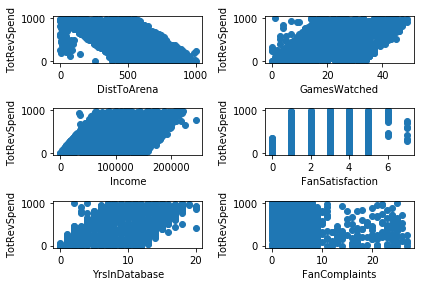

In [5]:
totRev = sheet1['TotRevSpend']
income = sheet1['Income']

features = list(sheet1)
features.remove('TotRevSpend')

for i in range(6):
    plt.subplot(320+1+i)
    plt.scatter(sheet1[features[i]], totRev)
    plt.xlabel(features[i])
    plt.ylabel('TotRevSpend')

plt.tight_layout()
plt.show()

## Feature Selection
Dropping columns having low impact

In [6]:
sheet1 = sheet1.drop('FanSatisfaction',1)
sheet1 = sheet1.drop('FanComplaints',1)
sheet1.head()

,TotRevSpend,DistToArena,GamesWatched,Income,YrsInDatabase
0,590,8,17,140610,9
1,122,73,9,83976,9
2,772,8,12,244366,15
3,910,22,10,203798,9
4,936,2,37,34955,20


## Data Distribution

In [7]:
from sklearn.model_selection import train_test_split

X, y = sheet1.iloc[:,1:], sheet1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

stdsc       = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std  = stdsc.transform(X_test)

In [17]:
from sklearn import linear_model

lr = linear_model.LinearRegression(n_jobs=6)
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.564483971127
Test accuracy: 0.542995338027
